<a href="https://colab.research.google.com/github/makdatascience/Retail_Sales_Prediction/blob/main/Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **REGRESSION**    
##### **INDIVIDUAL/TEAM**    
##### **Mohd Ashif Khan**
##### **Mayank Belwal**


# **Project Summary -**

Rossman Sales Prediction data is a data set that contain historical sales data for a retail store chain. The data includes information about the store, such as Competitior’s Detail, type, holiday’s, as well as number of the customers and sales transaction, such as the date, time, and amount of sale on each day.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


A Rossmann is a private drug store chain based in Germany, with main operations on Europe. Operates over **3,000 drug stores in 7 different contries**. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for **1,115** Rossmann stores. The task is to forecast the **"Sales"** column for the test set. Note that some record stores in dataset were temporarily closed for renovations.


#### **Define Your Business Objective?**

Analyse the historical sales data for 1,115 Rossmann stores and build a machine learning model to forecast the sales of each Rossmann store upto 6 weeks.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [211]:
gpu = !nvidia-smi -L
print(gpu[0])

#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab 

#importing Standard scaler
from sklearn.preprocessing import StandardScaler

# importing missingo library which helps us to visualize the missing values
import missingno as msno

# importing libary for VIF calcualtions
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing essential libraries to check the accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

# import elastic net regression from sklearn library
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV


NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.


### Dataset Loading

In [212]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [213]:
# df_rossmann = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capstone_Project_2/Rossmann Stores Data.csv")
# df_store = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capstone_Project_2/store.csv")


df_rossmann= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone projects/Capstone Project_2_Supervised_ML_Reg/Rossmann Stores Data.csv")
df_store=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone projects/Capstone Project_2_Supervised_ML_Reg/store.csv")

####**Dataset First View**

In [214]:
# Dataset First Look
df_rossmann.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [215]:
df_rossmann.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [216]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [217]:
df_store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


#### **Dataset Rows & Columns count**

In [218]:
# total number of rows in rossmann dataframe
num_of_rows = df_rossmann.shape[0]
print(f"Total no. of rows: {num_of_rows}")

num_of_columns = df_rossmann.shape[1]
print(f"Total no. of columns: {num_of_columns}")

Total no. of rows: 1017209
Total no. of columns: 9


In [219]:
# total number of rows in store dataframe
num_of_rows = df_store.shape[0]
print(f"Total no. of rows: {num_of_rows}")

num_of_columns = df_store.shape[1]
print(f"Total no. of columns: {num_of_columns}")

Total no. of rows: 1115
Total no. of columns: 10


#### **Dataset Information**

In [220]:
# Rossmann Dataset Info
df_rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [221]:
# Store Dataset Info
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### **Duplicate Values**

In [222]:
# number of duplicate rows
num_of_dup_rows = df_rossmann.duplicated(["Store","Date"]).sum()
print(f"No. of duplicate rows in rossmann dataset: {num_of_dup_rows}")

No. of duplicate rows in rossmann dataset: 0


In [223]:
num_of_dup_rows = df_store.duplicated(["Store"]).sum()
print(f"No. of duplicate rows in store dataset: {num_of_dup_rows}")

No. of duplicate rows in store dataset: 0


#### **Missing Values/Null Values**

In [224]:
# Missing Values/Null Values Count
df_rossmann.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [225]:
df_store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

The rossmann dataset does not contain null values but the store dataset have null values in dataset.So, we will deal these null values in future.

In [226]:
# importing missingo library which helps us to visualize the missing values
import missingno as msno

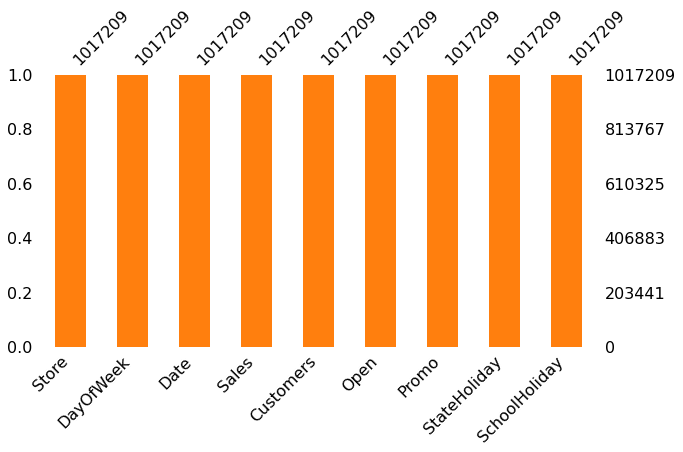

In [227]:
# Visualizing the missing values in Rossmann dataset
msno.bar(df_rossmann,figsize=(10,5), color="tab:orange")

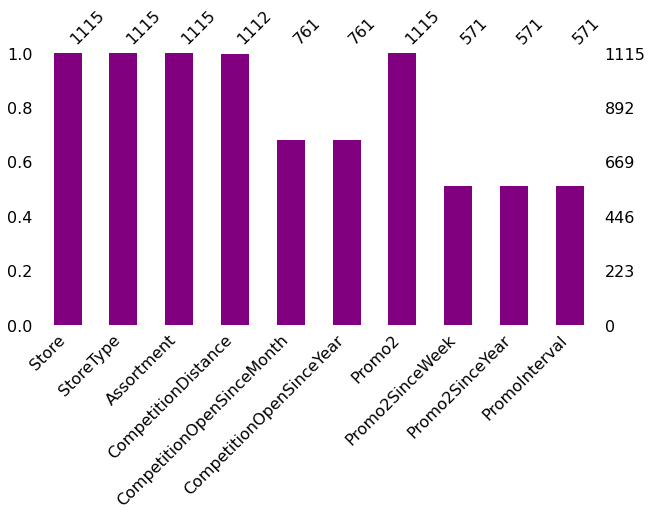

In [228]:
# Visualizing the missing values in Store dataset
msno.bar(df_store,figsize=(10,5),color="purple")

In [229]:
# define a function to find the number and percentage of missing values in a dataframe
df_null_store = pd.DataFrame((df_store.isna().sum()/df_store.shape[0])*100)
df_null_store["count"] = list(df_store.isna().sum().values)
df_null_store.rename(columns={0:"% of Null Values"},inplace=True)
df_null_store.sort_values(by = ["count"],ascending = False)

,% of Null Values,count
Promo2SinceWeek,48.789238,544
Promo2SinceYear,48.789238,544
PromoInterval,48.789238,544
CompetitionOpenSinceMonth,31.748879,354
CompetitionOpenSinceYear,31.748879,354
CompetitionDistance,0.269058,3
Store,0.000000,0
StoreType,0.000000,0
Assortment,0.000000,0
Promo2,0.000000,0


### What did you know about your dataset?

#####> Store dataframe contains 10 columns.
#####> Six columns have missing values.
#####>Four columns require conversion of datatypes.
#####Additionally, new columns need to be added from existing ones to make analysis easier

## ***2. Understanding Your Variables***

In [230]:
# Dataset Columns
list(df_rossmann.columns)

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

In [231]:
list(df_store.columns)

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [232]:
#Rossmann Dataset Describe
df_rossmann.describe(include="all")

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [233]:
# Store dataset describe
df_store.describe(include="all")

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


### Variables Description 


* Store - Store ID
* Sales - Sales for the given store on a given day (to be predicted)
* Customers - the number of customers on a given day (to be dropped)
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* StoreType - 4 different store types: a, b, c, d
* Assortment - Assortment level: a = basic, b = extra, c = extended. Represents the number and type of products displayed by the store
* CompetitionDistance - distance to the nearest competitor store
* CompetitionOpenSince[Month/Year] - Approximate year and month of the time the nearest competitor was opened
* Promo - Show if a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since[Year/Week] - The year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

#### **Check Unique Values for each variable**

In [234]:
# Check Unique Values for each variable.
df_rossmann.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [235]:
df_store.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

## 3. ***Data Wrangling***

#####**(a) Null Values Treament**

In [236]:
df_store[df_store["CompetitionDistance"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


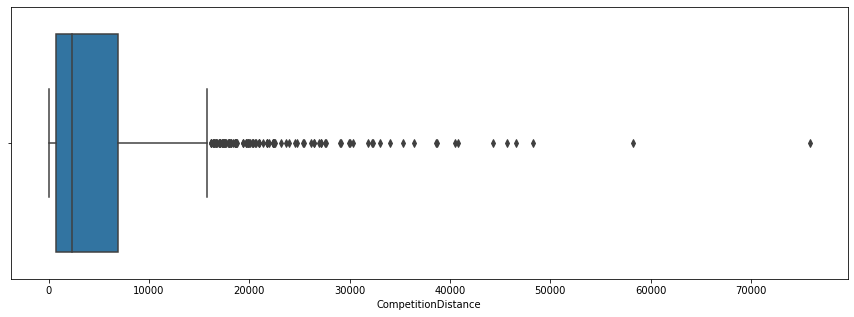

In [237]:
plt.figure(figsize=(15,5))
sns.boxplot(x= df_store["CompetitionDistance"])

In [238]:
#filling the missing values of Competition Distance with median
df_store['CompetitionDistance'].fillna(value = int(df_store.CompetitionDistance.median()), inplace = True)

In [239]:
#rechecking the null values in CompetitionDistance
df_store[df_store["CompetitionDistance"].isnull()].sum()

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

In [240]:
df_store[df_store['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [241]:
##Handling null values from CompetitionOpenSinceMonth and CompetitionOpenSinceYear feature.
df_store[df_store['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [242]:
df_store[df_store['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


<Figure size 1080x360 with 0 Axes>

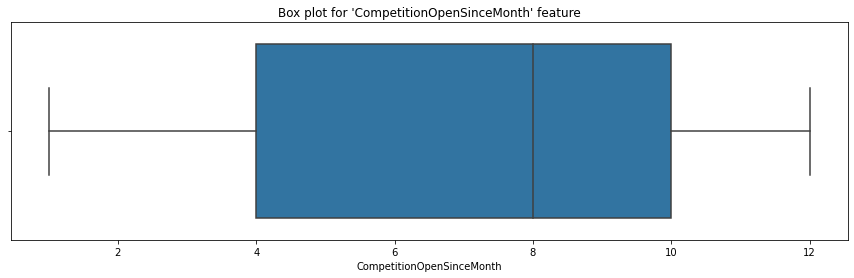

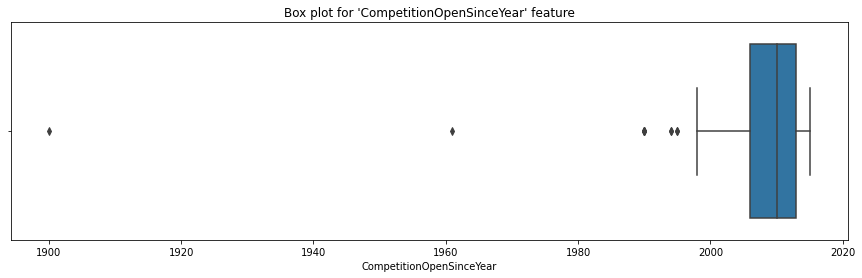

In [243]:
plt.figure(figsize=(15,5));
x= ["CompetitionOpenSinceMonth","CompetitionOpenSinceYear"];
for i in x:
  plt.figure(figsize=(15,4));
  sns.boxplot(df_store[i]);
  plt.title(f"Box plot for '{i}' feature");
  plt.show();

In [244]:
#filling the missing values with mode
df_store['CompetitionOpenSinceMonth'].fillna(value = df_store['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
df_store['CompetitionOpenSinceYear'].fillna(value = df_store['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [245]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [246]:
# filling the missing values with value 0 (Promo2SinceWeek, Promo2SinceYear and PromoInterval feature)
df_store["Promo2SinceWeek"].fillna(value = 0, inplace=True)
df_store["Promo2SinceYear"].fillna(value = 0, inplace=True)
df_store["PromoInterval"].fillna(value = 0, inplace=True)

In [247]:
#again checking null values
df_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [248]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


 >>Now, no missing values in dataframe.We can proceed for further analyses.

#### **Merging datasets**

In [249]:
# Write your code to make your dataset analysis ready.

# merging two dataframes on store column using left join
df= df_rossmann.merge(right=df_store,how="left",on="Store")
df.shape

(1017209, 18)

In [250]:
df.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

#### **Typecasting**

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [252]:
# changing dtype into required format from both the datasets
df["Date"]= pd.to_datetime(df["Date"],format="%Y/%m/%d")
df["CompetitionDistance"]= df["CompetitionDistance"].astype(int)
df["CompetitionOpenSinceMonth"]= df["CompetitionOpenSinceMonth"].astype(int)
df["CompetitionOpenSinceYear"]= df["CompetitionOpenSinceYear"].astype(int)
df["Promo2SinceWeek"]= df["Promo2SinceWeek"].astype(int)
df["Promo2SinceYear"]= df["Promo2SinceYear"].astype(int)

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [254]:
#Creating new column for Day, Week of the year , month and year for Date column
df["Date"]=pd.to_datetime(df["Date"])
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["day"]=df["Date"].dt.day
df["WeekOfYear"]=df["Date"].dt.weekofyear

######The distribution of CompetitionDistance is positively skewed. So it is safe to impute missing values with mode or median.

### What all manipulations have you done and insights you found?

We have done Data Wrangling in three steps:

* <b>Handling Missing Values</b>- We observed missing values in 6 columns

  *   <b>CompetitionDistance </b>- in this column we replaced the missing values with Median (since the data was positively skewed)
  *   <b>CompetitionOpenSinceMonth , CompetitionOpenSinceYear </b>- Missing values in these columns were replaced by their mode value
  *  <b>Promo2SinceWeek , Promo2SinceYear , PromoInterval</b> - Missing values were replaced by zero

* <b> Merging Dataset</b> - We merged the two datasets using left join, and since there were no null values, right join or inner join would also give us the same result.

* <b>Typecasting </b> - We converted <b>Date</b> column to datetime and float variables to integer.





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1-  Day v/s Sales

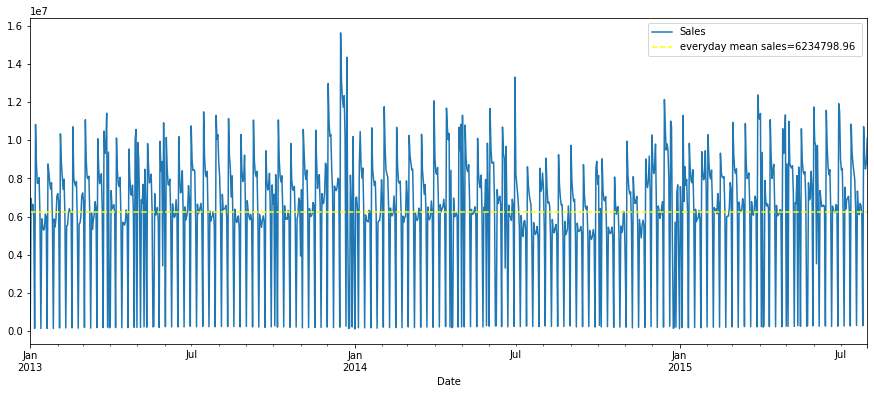

In [255]:
# Chart - 1 visualization code

#Visualizing everyday sales with average everyday sales 
fig, ax= plt.subplots(figsize=(15,6))

eday_sales=df.groupby(["Date"]).Sales.sum()
eday_sales.plot(kind="line",ax=ax)
plt.axhline(y=eday_sales.mean(), label=f"everyday mean sales={round(eday_sales.mean(),2)} ",color="yellow", linestyle="--")
plt.legend()


##### 1. Why did you pick the specific chart?

Line Chart was used to analyse the the total daily sales and see the fluctuations in it. 

##### 2. What is/are the insight(s) found from the chart?

Total daily sales does fluctuate a lot although it keeps rising up in very short period.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Upon visual analysis, we can see that the sales are almost evenly distributed around the average sales. This imples that overall, the daily sales have stabilised and new innovative steps need to be taken to increase the sales.

#### Chart - 2- Sales and Customers

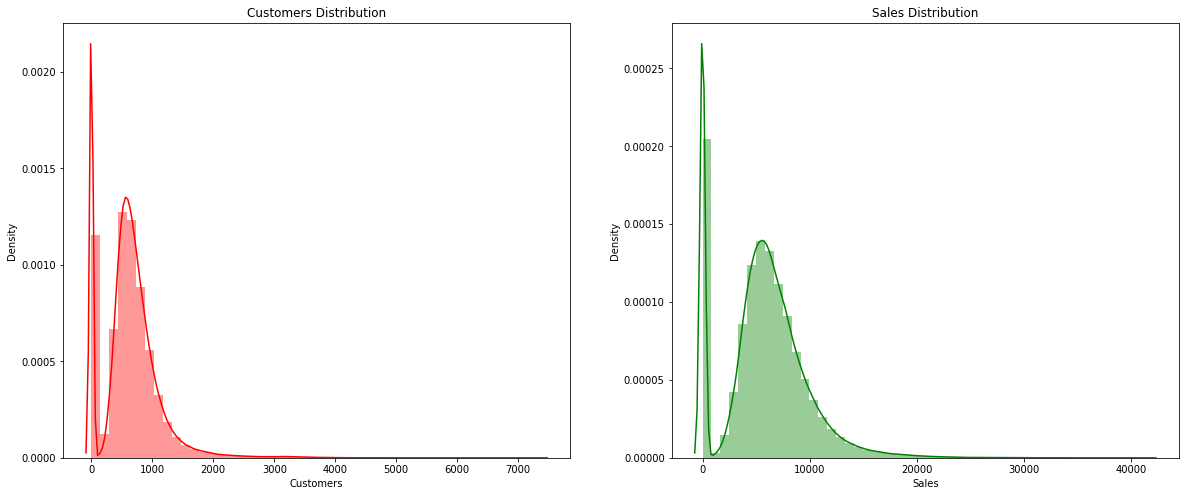

In [256]:
# Chart - 2 visualization code
cont = ['Customers','Sales']
colors = ['red', 'green', 'blue']
fig, axs = plt.subplots(1, len(cont), figsize = (20, 8))
for c in range(len(cont)):
    sns.distplot(df[cont[c]], color = colors[c], ax = axs[c])
    axs[c].set_title(f'{cont[c]} Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

Density plot to analyse the frequency Distribution of Customer, Sales

##### 2. What is/are the insight(s) found from the chart?

Customer and Sales have many values concentrated on zero.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Sales or Customer values concentrated around zero implies closed stores. This has impacted the revenue of the stores.

#### Chart - 3

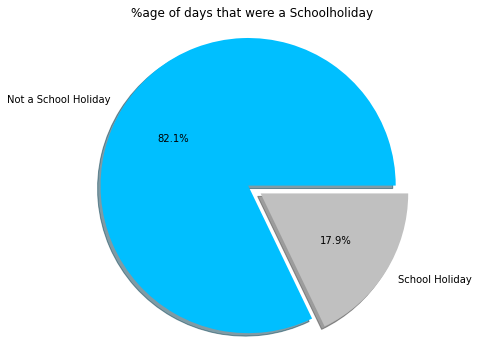

In [257]:
# Chart - 3 visualization code
labels = 'Not a School Holiday' , 'School Holiday'
sizes = df.SchoolHoliday.value_counts()
colors = ['deepskyBlue', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("%age of days that were a Schoolholiday ")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [258]:
df.SchoolHoliday.value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

##### 1. Why did you pick the specific chart?

To analyse the share of days that were school holidays

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

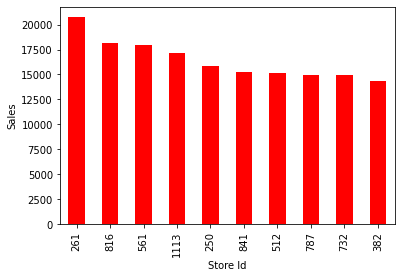

In [259]:
# Chart - 4 visualization code
# top 10 stores with highest average sales
top10stores = df_rossmann.groupby('Store').agg({'Sales': ['mean']}).reset_index()['Sales'].sort_values('mean', ascending = False)[:10]
top10stores['mean'].plot(kind = 'bar', color = 'r')
plt.ylabel('Sales')
plt.xlabel('Store Id')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

Text(0.5, 1.0, 'Sales vs Promotion (0-No Promotion, 1-Promotion)')

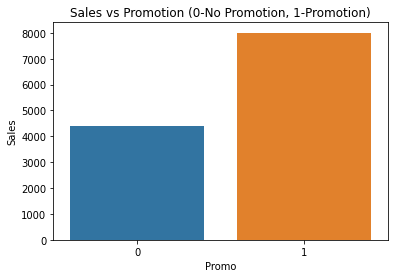

In [260]:
# Chart - 5 visualization code
ax= sns.barplot(x=df["Promo"], y=df["Sales"])
plt.title("Sales vs Promotion (0-No Promotion, 1-Promotion)")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [261]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [262]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [263]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [264]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [265]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [266]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [267]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [268]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [269]:
# Correlation Heatmap visualization code


##### 1. Why did you pick the specific chart?


Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [270]:
# Pair Plot visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [271]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [272]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [273]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [274]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
day                          0
WeekOfYear                   0
dtype: int64

We don't have any missing values. We alraedy removed all missing/null/duplicate values in Data Wrangling section.

#### What all missing value imputation techniques have you used and why did you use those techniques?

We checked all missing/null values of various columns and replaced with median and mode.

### 2. Handling Outliers

Lets check for outliers in competition distance with a box plot.

In [275]:
# generate a box plot for competition distance
#generate_horizontal_box_plot(df_rossmann, 'CompetitionDistance')

# count and percentage of outliers in competition distance
#count, perc = get_outlier_count_and_percentage(df_rossmann, 'CompetitionDistance')
#print(f"Outliers in competition distance : {count} ({perc}%)")

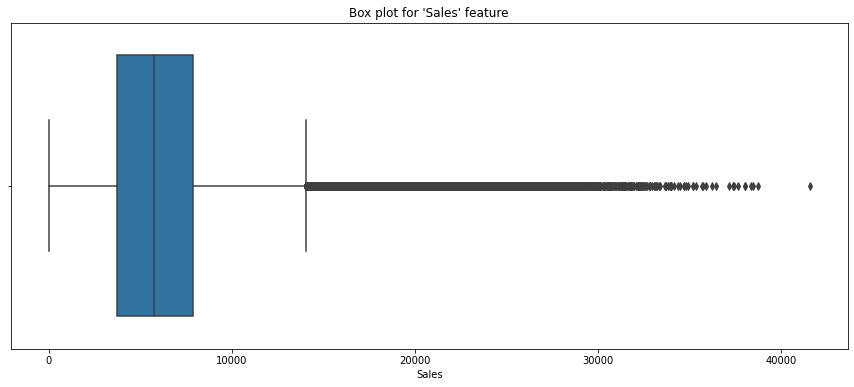

In [276]:
#df1=df1[df1['Sales']!=0]
plt.figure(figsize=(15,6))
sns.boxplot(df["Sales"])
plt.title("Box plot for 'Sales' feature")
plt.show()

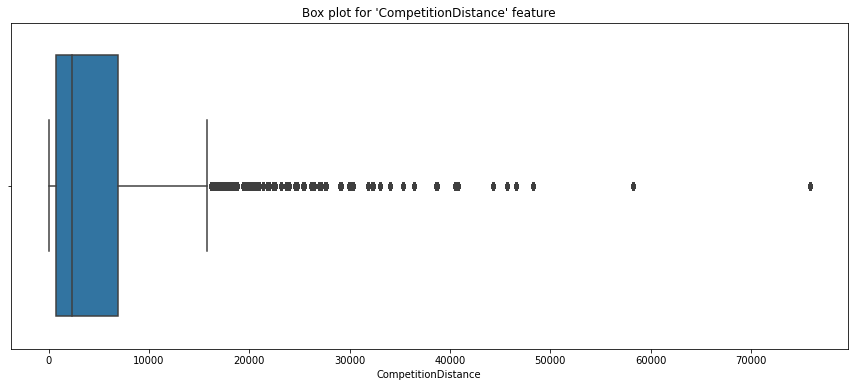

In [277]:
plt.figure(figsize=(15,6))
sns.boxplot(df["CompetitionDistance"])
plt.title("Box plot for 'CompetitionDistance' feature")
plt.show()

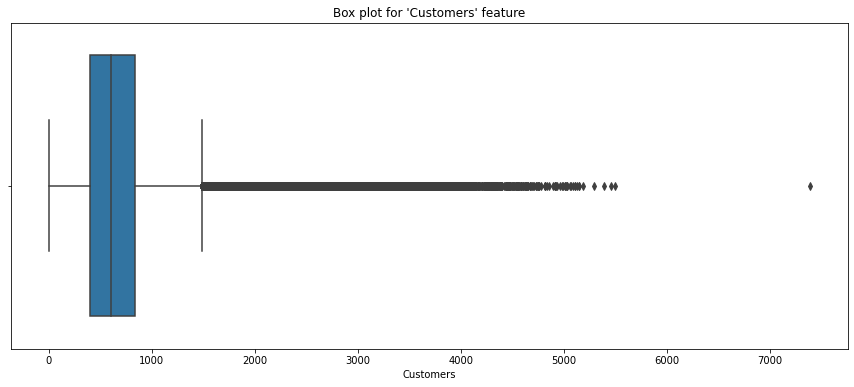

In [278]:
plt.figure(figsize=(15,6))
sns.boxplot(df["Customers"])
plt.title("Box plot for 'Customers' feature")
plt.show()

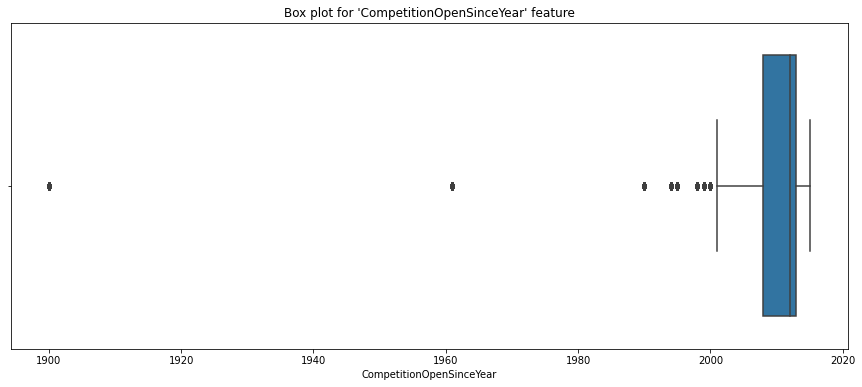

In [279]:
plt.figure(figsize=(15,6))
sns.boxplot(df["CompetitionOpenSinceYear"])
plt.title("Box plot for 'CompetitionOpenSinceYear' feature")
plt.show()

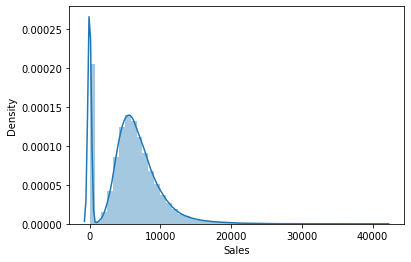

In [280]:
# Handling Outliers & Outlier treatments
df1=df.copy()
sns.distplot(df1.Sales)
# will be removing rows with zero sales

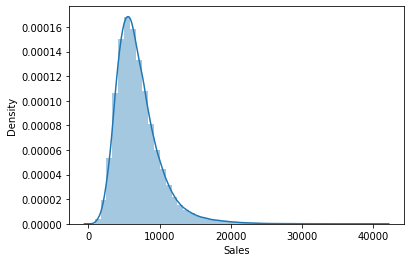

In [281]:
df1=df1[df1['Sales']!=0]
sns.distplot(df1.Sales)
# right skewed distribution, we will apply log transformation on slaes column

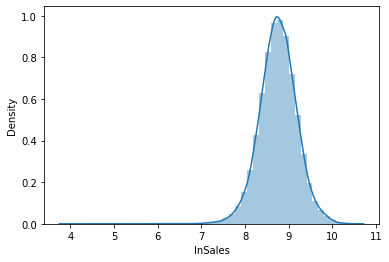

In [282]:
df1["lnSales"]=np.log(df1["Sales"])
sns.distplot(df1.lnSales)

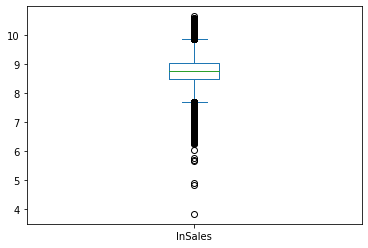

In [283]:
df1["lnSales"].plot(kind="box")

In [284]:
df1["lnSales"].describe()

count    844338.000000
mean          8.757564
std           0.425278
min           3.828641
25%           8.488588
50%           8.759198
75%           9.031214
max          10.634677
Name: lnSales, dtype: float64

10.05

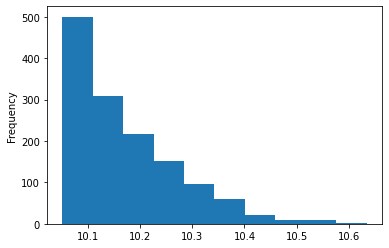

In [285]:
# we will be treating data outside 3 standard deviation as outlier
sales_mean= round(df1["lnSales"].mean(),2)
sales_std=round(df1["lnSales"].std(),2)
sls_uprbnd=sales_mean+3*sales_std
df1[df1["lnSales"]>sls_uprbnd].shape
df1[df1["lnSales"]>sls_uprbnd].shape[0]/df1["lnSales"].shape[0]
df1[df1["lnSales"]>sls_uprbnd]["lnSales"].plot(kind="hist")
sls_uprbnd

In [286]:
# checking how many times promotion was going on when stores had abnormally high sales 
df1[df1["lnSales"]>sls_uprbnd].Promo.value_counts()

1    994
0    382
Name: Promo, dtype: int64

This implies that promotion does have a impact on sales

In [287]:
# checking for reasons of abnormally high sales when no promotion was going on
temp=df1[(df1["lnSales"]>sls_uprbnd)] 
temp=temp[temp["Promo"]!=1]
for c in list(temp.columns):
 if c in ["Store","DayOfWeek","StoreType","CompetitionDistance","Month"]:
  print(f" Value counts of {c}")
  print(temp[c].value_counts().head(10))

 Value counts of Store
262     146
817      48
1114     39
842      20
756      18
251      15
586      12
523      10
513       7
562       7
Name: Store, dtype: int64
 Value counts of DayOfWeek
7    128
6     86
1     79
5     31
2     26
4     19
3     13
Name: DayOfWeek, dtype: int64
 Value counts of StoreType
a    176
b    153
c     28
d     25
Name: StoreType, dtype: int64
 Value counts of CompetitionDistance
1180    146
140      50
870      39
50       29
1200     20
340      15
250      15
400       7
1210      7
1130      6
Name: CompetitionDistance, dtype: int64
 Value counts of Month
12    124
5      49
6      31
4      30
2      26
11     25
3      24
1      21
7      17
10     15
Name: Month, dtype: int64


Upon Analysing the value counts for sales> sls_uprbnd and promotion not applied, we notice the following points:



*   High sales happened mostly in the case of December, in store type 'a' or 'b'
*   Also it happened most of the times when the Day of the week was Saturday(6),Sunday(7) or Monday(1)

So we will not be doing anything with the outliers , since they do not occur randomly.


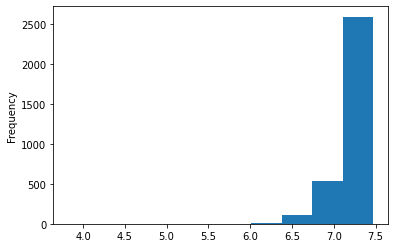

In [288]:
sls_lwrbnd=sales_mean-3*sales_std
df1[df1["lnSales"]<sls_lwrbnd].shape
df1[df1["lnSales"]<sls_lwrbnd].shape[0]/df1["lnSales"].shape[0]
df1[df1["lnSales"]<sls_lwrbnd]["lnSales"].plot(kind="hist")

In [289]:
df1[df1["lnSales"]<sls_lwrbnd].Promo.value_counts()

0    3131
1     120
Name: Promo, dtype: int64

Again,Lower sales happen when no promotion was going on

In [290]:
# checking for reasons of abnormally low sales when promotion was going on
temp=df1[(df1["lnSales"]<sls_lwrbnd)] 
temp=temp[temp["Promo"]!=0]
for c in list(temp.columns):
 if c in ["SchoolHoliday","DayOfWeek","StoreType","CompetitionDistance","Month","StateHoliday"]:
  print(f" Value counts of {c}")
  print(temp[c].value_counts().head(10))

 Value counts of DayOfWeek
1    40
4    27
2    25
3    15
5    13
Name: DayOfWeek, dtype: int64
 Value counts of StateHoliday
0    93
0    21
a     6
Name: StateHoliday, dtype: int64
 Value counts of SchoolHoliday
0    109
1     11
Name: SchoolHoliday, dtype: int64
 Value counts of StoreType
a    86
c    18
d    11
b     5
Name: StoreType, dtype: int64
 Value counts of CompetitionDistance
360      26
11470     8
600       8
740       6
3640      5
620       4
250       4
26490     4
180       3
12430     3
Name: CompetitionDistance, dtype: int64
 Value counts of Month
2     39
3     33
1     29
6      8
10     4
8      2
5      1
7      1
12     1
11     1
Name: Month, dtype: int64


Upon Analysing the value counts for sales< sls_lwrbnd and promotion applied, we notice the following points:



*   Low sales have never happened on a Saturday or Sunday 
*   Also it happened most of the times in 'a' Store type or in the 1st quarter, i.e Jan, Feb , March.

So we will not be doing anything with the outliers , since they do not occur randomly.

In [291]:
# sls_lwrbnd=sales_mean-3*sales_std
# df1[df1["lnSales"]<sls_lwrbnd].shape
# df1[df1["lnSales"]>sls_lwrbnd].shape[0]/df1["lnSales"].shape[0]
# df1[df1["lnSales"]>sls_lwrbnd]["lnSales"].plot(kind="hist")

In [292]:
#df1[df1["lnSales"]<sls_lwrbnd].Promo.value_counts()

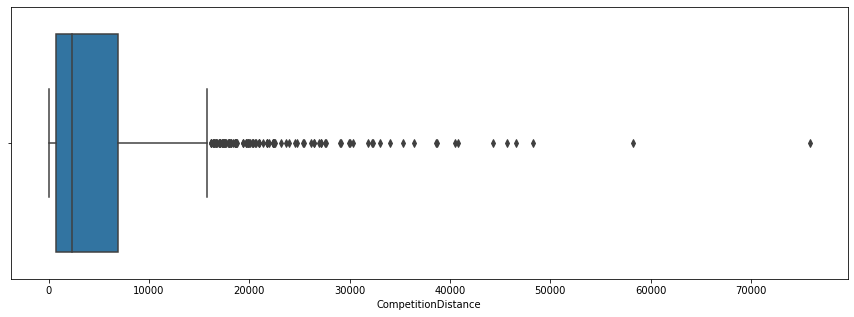

In [293]:
# plotting seaborn box plot to check the outliers in CompetitionDistance features
plt.figure(figsize=(15,5))
sns.boxplot(x= df_store["CompetitionDistance"])

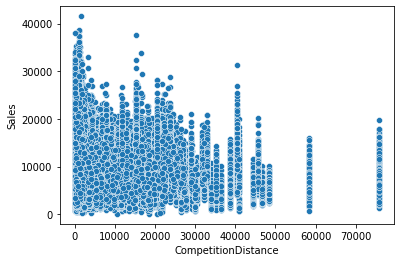

In [294]:
sns.scatterplot(df1["CompetitionDistance"],df1["Sales"])

In [295]:
df1["CompetitionDistance"].describe()

count    844338.000000
mean       5450.044852
std        7801.082007
min          20.000000
25%         710.000000
50%        2325.000000
75%        6880.000000
max       75860.000000
Name: CompetitionDistance, dtype: float64

In [296]:
sumsales_a=df1[df1["CompetitionDistance"]<710].Sales.sum()
sumsales_b=df1[(df1["CompetitionDistance"]<2325) & (df1["CompetitionDistance"]>=710) ].Sales.sum()
sumsales_c=df1[(df1["CompetitionDistance"]<6880) & (df1["CompetitionDistance"]>=2325)].Sales.sum()
sumsales_d=df1[df1["CompetitionDistance"]>=6880].Sales.sum()
totalsales=df1["Sales"].sum()
[sumsales_a/totalsales,sumsales_b/totalsales,sumsales_c/totalsales,sumsales_d/totalsales]
# we can see that sales get evenly divided when we divide the competition distance into 4 parts, based on 1st,2nd and 3rd quantile values of Competition Distance.

[0.2616208047446594,
 0.2506662315534238,
 0.2415711693667079,
 0.24614179433520889]

We will be encoding <b>Competitiondistance </b> as 1,2,3,4, 
1 signifying that the competition is closely located and 4 signifying that the competition is far away

From the Scatter plot also we can notice that sales density decreased (plot became more sparse) as Competition distance increased.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [297]:
# Encode your categorical columns

# encoding competition distance as 1,2,3,4 based on the values of Quantile
def dist_code(x):
  if(x<710):
    return(1)
  elif(x>=710 and x<2325):
    return(2)
  elif(x>=2325 and x<6880):
    return(3)
  elif(x>=6880):
    return(4) 
df1["CompetitionDistanceCode"]=list(map(dist_code,df1["CompetitionDistance"]))

# 0 - not a state holiday; 1- is on a state holiday
df1['StateHoliday'] = df1.StateHoliday.map({'0':0, 'a':1 ,'b' : 1,'c': 1}).fillna(0)

print(df1["CompetitionDistanceCode"].value_counts())

2    211941
4    211641
3    211595
1    209161
Name: CompetitionDistanceCode, dtype: int64


In [298]:
df1["StateHoliday"].value_counts()

0.0    843428
1.0       910
Name: StateHoliday, dtype: int64

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [299]:
# Expand Contraction

#### 2. Lower Casing

In [300]:
# Lower Casing

#### 3. Removing Punctuations

In [301]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [302]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [303]:
# Remove Stopwords

In [304]:
# Remove White spaces

#### 6. Rephrase Text

In [305]:
# Rephrase Text

#### 7. Tokenization

In [306]:
# Tokenization

#### 8. Text Normalization

In [307]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [308]:
# POS Taging

#### 10. Text Vectorization

In [309]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

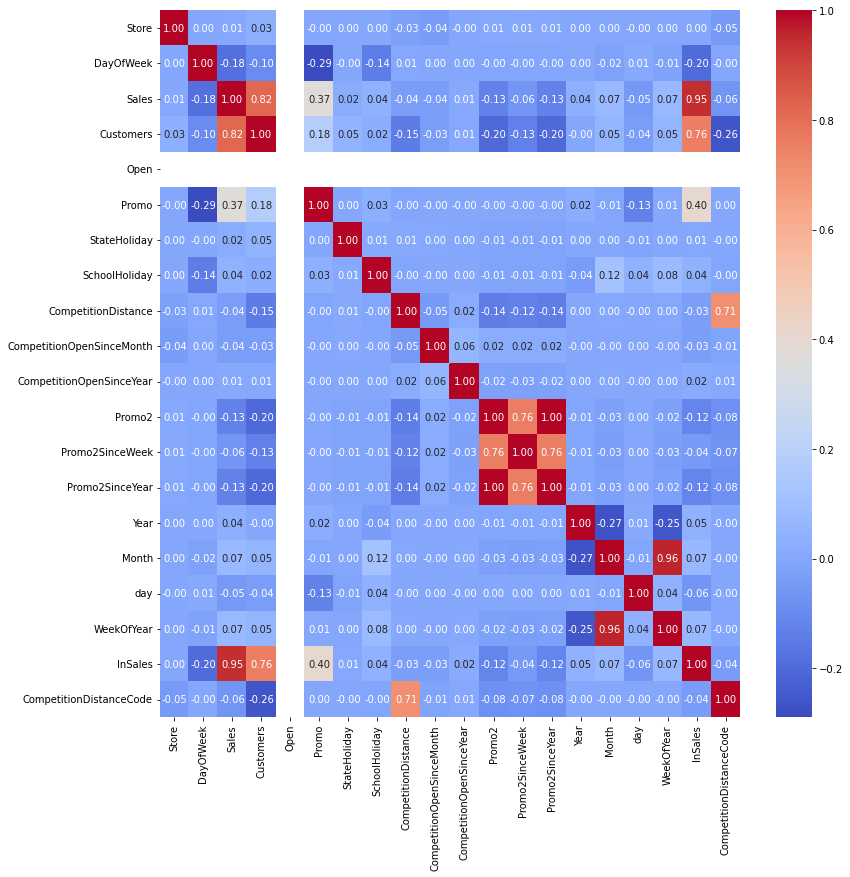

In [310]:
# Manipulate Features to minimize feature correlation and create new features

corr_map=df1.corr()
plt.rcParams['figure.figsize'] = 13,13
sns.heatmap(corr_map,annot=True, fmt=".2f", cmap="coolwarm");

In [311]:
df1['Promo2Open'] = (df1['Year'] - df1['Promo2SinceYear'])*12 + abs(df1['WeekOfYear'] - df1['Promo2SinceWeek'])*(7/(365/12))
df1["PromoInterval"].unique()

array([0, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [312]:
# Since unique values in Promo Interval were only 4, we used map function to map the values to a list containing the corresponding month number
df1["PromoInterval"]=df1["PromoInterval"].map({'Jan,Apr,Jul,Oct':[1,4,7,10],'Feb,May,Aug,Nov' :[2,5,8,11] ,'Mar,Jun,Sept,Dec' :[3,6,9,12]}).fillna(0)
df1["PromoInterval"]


0                      0
1          [1, 4, 7, 10]
2          [1, 4, 7, 10]
3                      0
4                      0
               ...      
1016776                0
1016827                0
1016863    [1, 4, 7, 10]
1017042                0
1017190                0
Name: PromoInterval, Length: 844338, dtype: object

In [313]:
df1[(df1["Promo"]==1) & (df1["Promo2"]==0)]["Store"].nunique()

544

In [314]:
#creating a new feature Promo2_active which will record if Promo2 was running in that month by checking promointerval column and Promo2 and the month of the sales
def pr2_run(k):
  if k["PromoInterval"]==0:
    return 0
  elif k["Month"]  in k["PromoInterval"] and k["Promo2"]==1:
    return 1
  else:
    return 0

df1["Promo2_active"]=df1.apply(pr2_run, axis=1)

In [315]:
df1["Promo2_active"].value_counts()

0    699125
1    145213
Name: Promo2_active, dtype: int64

In [316]:
#Creating Competitionopensincemonths to capture the total duration in months instead of weeks and year

df1['Competitionopensincemonths'] = (df1['Year'] - df1['CompetitionOpenSinceYear'])*12 + abs(df1['Month'] - df1['CompetitionOpenSinceMonth'])

In [317]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,PromoInterval,Year,Month,day,WeekOfYear,lnSales,CompetitionDistanceCode,Promo2Open,Promo2_active,Competitionopensincemonths
0,1,5,2015-07-31,5263,555,1,1,0.0,1,c,...,0,2015,7,31,31,8.568456,2,24187.134247,0,86
1,2,5,2015-07-31,6064,625,1,1,0.0,1,a,...,"[1, 4, 7, 10]",2015,7,31,31,8.710125,1,64.142466,1,100
2,3,5,2015-07-31,8314,821,1,1,0.0,1,a,...,"[1, 4, 7, 10]",2015,7,31,31,9.025696,4,51.912329,1,113
3,4,5,2015-07-31,13995,1498,1,1,0.0,1,c,...,0,2015,7,31,31,9.546455,1,24187.134247,0,74
4,5,5,2015-07-31,4822,559,1,1,0.0,1,a,...,0,2015,7,31,31,8.480944,4,24187.134247,0,3


#### 2. Feature Selection

In [318]:
len(list(df1.columns))

27

In [319]:
# columns to be dropped
drop_feature=['Sales', 'Customers', 'Open','CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'day']
df1.drop(columns=drop_feature, inplace=True)

In [320]:
(df1.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'WeekOfYear', 'lnSales',
       'CompetitionDistanceCode', 'Promo2Open', 'Promo2_active',
       'Competitionopensincemonths'],
      dtype='object')

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [321]:
# Transform Your data
# Encoding Nominal Categorical Columns 
df_new=pd.get_dummies(df1, dtype=int, drop_first=True)
df_new.head()

,Store,DayOfWeek,Date,Promo,StateHoliday,SchoolHoliday,WeekOfYear,lnSales,CompetitionDistanceCode,Promo2Open,Promo2_active,Competitionopensincemonths,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5,2015-07-31,1,0.0,1,31,8.568456,2,24187.134247,0,86,0,1,0,0,0
1,2,5,2015-07-31,1,0.0,1,31,8.710125,1,64.142466,1,100,0,0,0,0,0
2,3,5,2015-07-31,1,0.0,1,31,9.025696,4,51.912329,1,113,0,0,0,0,0
3,4,5,2015-07-31,1,0.0,1,31,9.546455,1,24187.134247,0,74,0,1,0,0,1
4,5,5,2015-07-31,1,0.0,1,31,8.480944,4,24187.134247,0,3,0,0,0,0,0


In [322]:
df_new.columns

Index(['Store', 'DayOfWeek', 'Date', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'WeekOfYear', 'lnSales', 'CompetitionDistanceCode', 'Promo2Open',
       'Promo2_active', 'Competitionopensincemonths', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c'],
      dtype='object')

In [323]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Store                       844338 non-null  int64         
 1   DayOfWeek                   844338 non-null  int64         
 2   Date                        844338 non-null  datetime64[ns]
 3   Promo                       844338 non-null  int64         
 4   StateHoliday                844338 non-null  float64       
 5   SchoolHoliday               844338 non-null  int64         
 6   WeekOfYear                  844338 non-null  int64         
 7   lnSales                     844338 non-null  float64       
 8   CompetitionDistanceCode     844338 non-null  int64         
 9   Promo2Open                  844338 non-null  float64       
 10  Promo2_active               844338 non-null  int64         
 11  Competitionopensincemonths  844338 non

In [324]:
vif = pd.DataFrame()
temp=df_new[[ 'Store', 'DayOfWeek',  'Promo', 'StateHoliday', 'SchoolHoliday',
       'WeekOfYear', 'CompetitionDistanceCode', 'Promo2Open',
       'Promo2_active', 'Competitionopensincemonths', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c']].copy()
vif["variables"] = temp.columns
vif["VIF"] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]

In [325]:
vif

,variables,VIF
0,Store,3.454861
1,DayOfWeek,4.188767
2,Promo,1.761699
3,StateHoliday,1.015341
4,SchoolHoliday,1.249341
5,WeekOfYear,3.276794
6,CompetitionDistanceCode,5.591379
7,Promo2Open,2.431376
8,Promo2_active,1.451184
9,Competitionopensincemonths,1.536009


The VIF values are below 10 and hence are acceptable ranges of Multicollinearity.

### 6. Data Scaling

In [326]:
# Scaling your data
df_new.columns

Index(['Store', 'DayOfWeek', 'Date', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'WeekOfYear', 'lnSales', 'CompetitionDistanceCode', 'Promo2Open',
       'Promo2_active', 'Competitionopensincemonths', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c'],
      dtype='object')

In [327]:
# Scaling your data
df_scale=df_new.copy()

#instantiating Standard Scaler object
std_scaler= StandardScaler()

#Applying standard scaler
df_scale[['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'WeekOfYear',  'CompetitionDistanceCode', 'Promo2Open',
       'Promo2_active', 'Competitionopensincemonths', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c']]= std_scaler.fit_transform(df_scale[['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'WeekOfYear',  'CompetitionDistanceCode', 'Promo2Open',
       'Promo2_active', 'Competitionopensincemonths', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c']])

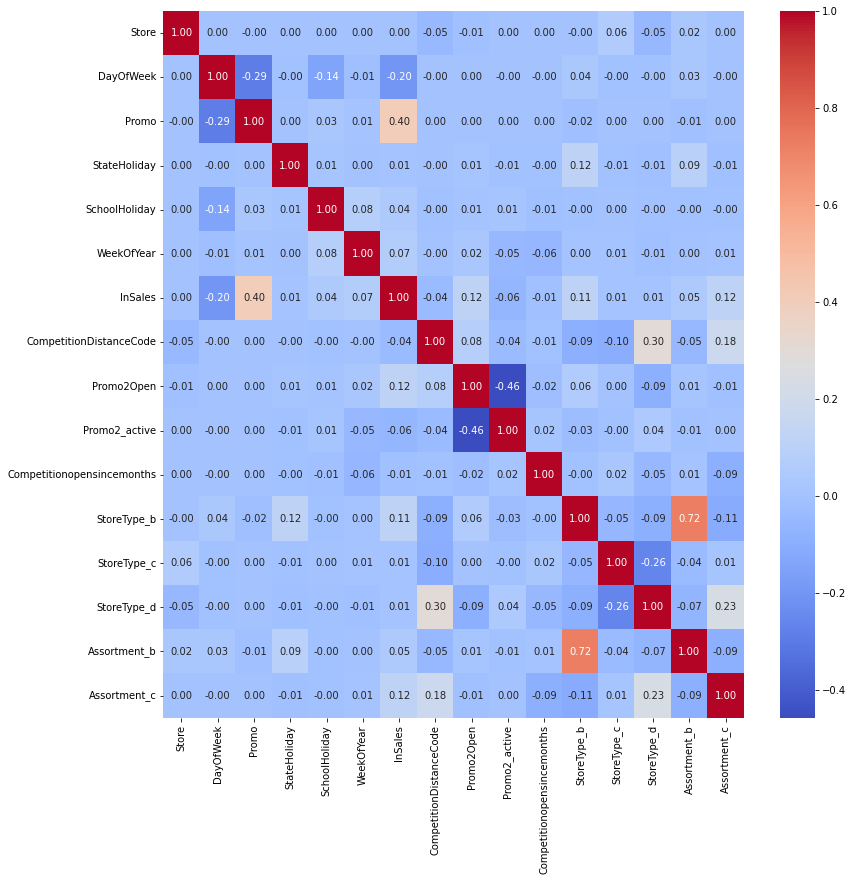

In [328]:
corr_map=df_scale.corr()
plt.rcParams['figure.figsize'] = 13,13
sns.heatmap(corr_map,annot=True, fmt=".2f", cmap="coolwarm");

In [329]:
df_new["Date"].describe()

count                  844338
unique                    942
top       2014-04-16 00:00:00
freq                     1115
first     2013-01-01 00:00:00
last      2015-07-31 00:00:00
Name: Date, dtype: object

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [330]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [331]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split your data to train and test. Choose Splitting ratio wisely.
# start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
df_train= df_scale[df["Date"]<=end_train]
#test
start_test = pd.to_datetime("2015-06-15")
# end_test = pd.to_datetime("2015-07-31")
df_test = df_scale[df["Date"]>end_train]


In [332]:
df_train.head()

,Store,DayOfWeek,Date,Promo,StateHoliday,SchoolHoliday,WeekOfYear,lnSales,CompetitionDistanceCode,Promo2Open,Promo2_active,Competitionopensincemonths,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
52489,-1.471484,2.018697,2015-06-14,-0.897894,-0.032847,-0.489944,0.024535,9.427144,-0.451559,0.998499,-0.455749,0.044611,7.298176,-0.393015,-0.664762,-0.099085,-0.929266
52526,-1.356480,2.018697,2015-06-14,-0.897894,-0.032847,-0.489944,0.024535,8.218518,1.339629,0.998499,-0.455749,-0.356774,-0.137021,-0.393015,-0.664762,-0.099085,1.076118
52613,-1.086068,2.018697,2015-06-14,-0.897894,-0.032847,-0.489944,0.024535,8.055792,1.339629,-1.002920,-0.455749,0.029173,-0.137021,-0.393015,-0.664762,-0.099085,1.076118
52663,-0.930658,2.018697,2015-06-14,-0.897894,-0.032847,-0.489944,0.024535,9.827416,-1.347154,0.998499,-0.455749,-0.341336,7.298176,-0.393015,-0.664762,10.092332,-0.929266
52666,-0.921334,2.018697,2015-06-14,-0.897894,-0.032847,-0.489944,0.024535,10.306850,-0.451559,0.998499,-0.455749,-0.372212,7.298176,-0.393015,-0.664762,-0.099085,-0.929266


In [333]:
#Splitting the data into features and target
X_train=df_train[['Store', 'DayOfWeek', 'Date', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'WeekOfYear', 'CompetitionDistanceCode', 'Promo2Open',
       'Promo2_active', 'Competitionopensincemonths', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c']]
X_test=df_test[['Store', 'DayOfWeek', 'Date', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'WeekOfYear', 'CompetitionDistanceCode', 'Promo2Open',
       'Promo2_active', 'Competitionopensincemonths', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c']]
y_train,y_test=df_train[['lnSales']],df_test[['lnSales']]

In [334]:
#Dropping Date columns
X_train.drop(columns=["Date"],inplace=True)
X_test.drop(columns=["Date"],inplace=True)

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [335]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1- Linear Regression ( Baseline Model)

This model will be our baseline model and will help us in analysing if we are making any progress with the other models. Although we are using  other metrics also, we can compare metrics achieved with this model to analyse the performance of future models

In [336]:
# Importing LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

In [337]:
# ML Model - 1 Implementation
np.random.seed(42)  # for reproducible results
linear_regressor= LinearRegression()

# Fit the Algorithm
linear_regressor.fit(X_train,y_train)

# Predict on the model
y_train_regression_pred= linear_regressor.predict(X_train)
y_test_regression_pred= linear_regressor.predict(X_test)

<u>Checking the coefficients:


In [338]:
# len(linear_regressor.coef_.tolist())
linear_regressor.coef_[0]

array([ 0.00041172, -0.0355486 ,  0.16148054, -0.00329502,  0.00711196,
        0.02616501, -0.0298355 ,  0.04757363, -0.00388383,  0.00327245,
        0.07300146,  0.00304848,  0.00861294, -0.02624989,  0.05782414])

Text(0.5, 1.0, ' Feature Importances')

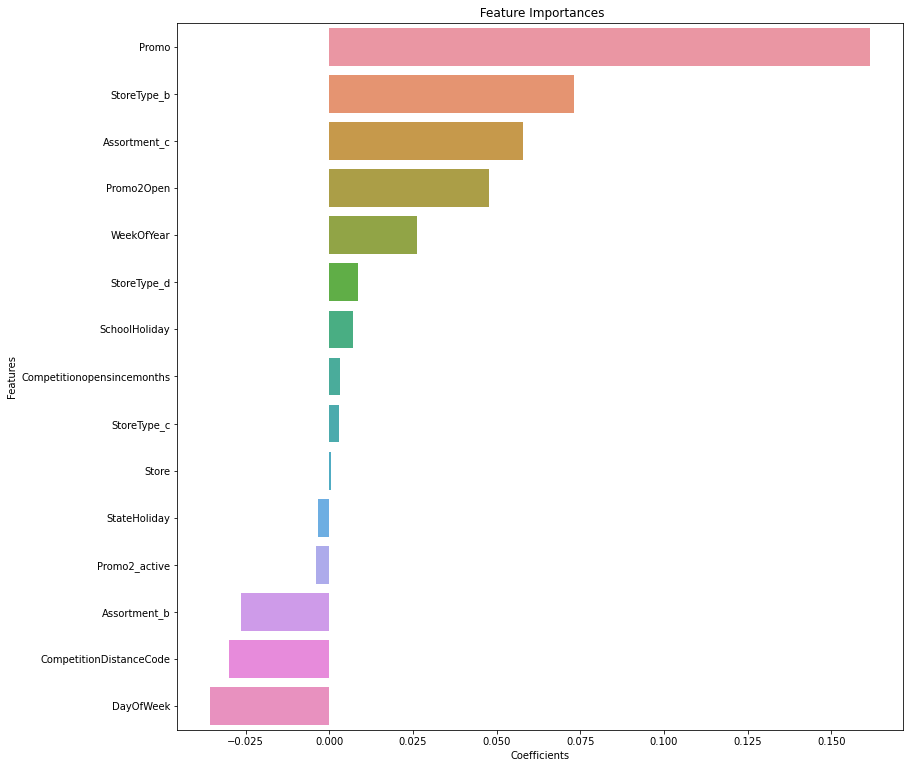

In [339]:
# Checking the coefficients
temp=pd.DataFrame()
temp["Features"]=X_train.columns
temp["Coefficients"]=linear_regressor.coef_[0].tolist()
temp.sort_values(by=["Coefficients"],ascending= False, inplace= True)
sns.barplot(temp["Coefficients"],temp["Features"])
plt.title(" Feature Importances")

# sns.barplot(list(X_train.columns),linear_regressor.coef_[0].tolist())

Explaining the model result:

Analysing the coeffcients of Feature importances for this model, we observe the following points:


*   Promo has the highest +ve impact on sales 
*   Store type 'b' and 'c' also contribute towards sales
*   Promo 2 also has a positive impact on sales
*   Day of the week has -ve impact on sales



Checking the intercept:

In [340]:
# Checking the intercept
linear_regressor.intercept_

array([8.75700665])

<u>Making a function to the calculate metrics for analysing model performance 

In [341]:
# Importing essential libraries to check the accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [342]:

# Defining the function that calculated regression metrics
def regression_metrics(model_name,y_train_actual,y_train_pred,y_test_actual,y_test_pred):
  print("-"*50)

  # converting log values back to original values
  y_train_actual,y_train_pred,y_test_actual,y_test_pred=np.exp(y_train_actual),np.exp(y_train_pred),np.exp(y_test_actual),np.exp(y_test_pred)
  ## mean_absolute_error
  MAE_train= mean_absolute_error(y_train_actual,y_train_pred)
  print("MAE on train is:" ,MAE_train)
  MAE_test= mean_absolute_error(y_test_actual,y_test_pred)
  print("MAE on test is:" ,MAE_test)

  print("-"*50)

  ## mean_squared_error
  MSE_train= mean_squared_error(y_train_actual, y_train_pred)
  MSE_test  = mean_squared_error(y_test_actual, y_test_pred)

  ## root_mean_squared_error
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is:" ,RMSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is:" ,RMSE_test)

  print("-"*50)

  ## mean_absolute_percentage_error
  MAPE_train = mean_absolute_percentage_error(y_train_actual, y_train_pred)*100
  print("MAPE on train is:" ,MAPE_train, " %")
  MAPE_test = mean_absolute_percentage_error(y_test_actual, y_test_pred)*100
  print("MAPE on test is:" ,MAPE_test, " %")

  print("-"*50)

  ## r2_score
  R2_train= r2_score(y_train_actual,y_train_pred)
  print("R2 on train is:" ,R2_train)  
  R2_test= r2_score(y_test_actual,y_test_pred)
  print("R2 on test is:" ,R2_test)

  print("-"*50)

  Accuracy_train= 100- MAPE_train
  print("Accuracy of train is:" ,Accuracy_train, " %")
  Accuracy_test= 100- MAPE_test
  print("Accuracy of test is:" ,Accuracy_test, " %")

  print("-"*50)

  # returning the metrics as a list
  global comparison_columns
  comparison_columns = ['Model_Name', 'Train_MAE', 'Train_RMSE', 'Train_R2', 'Train_MAPE' ,'Test_MAE', 'Test_RMSE', 'Test_R2','Test_MAPE']
  metric_scores = [model_name,MAE_train,RMSE_train,R2_train,MAPE_train,MAE_test,RMSE_test,R2_test, MAPE_test]
  final_dict = dict(zip(comparison_columns,metric_scores))
  return [final_dict]

In [343]:
metric_list = []
def add_to_metric_df(dict_list):
  global metric_list
  for elem in dict_list:
    metric_list.append(elem)
  global metric_df
  metric_df = pd.DataFrame(metric_list, columns= comparison_columns)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [344]:
# Visualizing evaluation Metric Score chart
a=regression_metrics("Linear Regression", y_train,y_train_regression_pred,y_test,y_test_regression_pred)

--------------------------------------------------
MAE on train is: 1981.996247354908
MAE on test is: 1909.5102371184425
--------------------------------------------------
RMSE on train is: 2804.5860216365804
RMSE on test is: 2720.017227378809
--------------------------------------------------
MAPE on train is: 30.99774556660077  %
MAPE on test is: 28.404424291478534  %
--------------------------------------------------
R2 on train is: 0.18377743487803977
R2 on test is: 0.2247122133183831
--------------------------------------------------
Accuracy of train is: 69.00225443339923  %
Accuracy of test is: 71.59557570852147  %
--------------------------------------------------


<U>Visualising Residual Plot

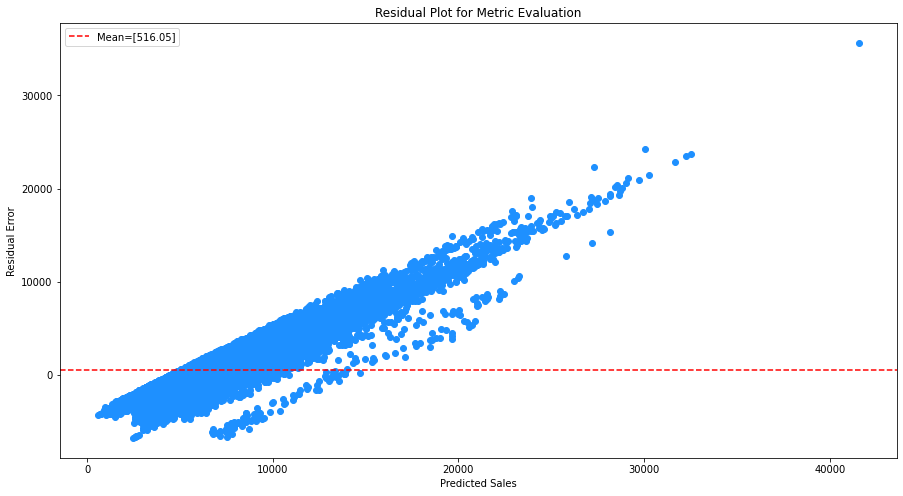

In [345]:
residuals = np.exp(y_test) - np.exp(y_test_regression_pred)
res_mean=residuals.mean().values.round(2)
plt.figure(figsize=(15,8))
plt.scatter(np.exp(y_test), residuals, c="dodgerblue")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

plt.axhline(y=res_mean, color='red', linestyle='--', label=f"Mean={res_mean}")
plt.legend();

#### 2. Cross- Validation & Hyperparameter Tuning

In [346]:
# Applying cross validation to check for improvements
np.random.seed(42)  # for reproducible results
Glinear_regressor= LinearRegression()
parameters = {'fit_intercept':[True,False]}
Grid_reg = GridSearchCV(Glinear_regressor,parameters, scoring='neg_mean_squared_error', cv=5)

# Fit the Algorithm
Grid_reg.fit(X_train,y_train)
# Predict on the model
y_train_gridreg_pred = Grid_reg.predict(X_train)
y_test_gridreg_pred = Grid_reg.predict(X_test)

print(f"The best alpha value found out to be: {Grid_reg.best_params_}")
print(f"Negative mean square error is: {Grid_reg.best_score_}")

The best alpha value found out to be: {'fit_intercept': True}
Negative mean square error is: -0.14314722056390897


In [347]:
Grid_reg.best_estimator_.coef_

array([[ 0.00041172, -0.0355486 ,  0.16148054, -0.00329502,  0.00711196,
         0.02616501, -0.0298355 ,  0.04757363, -0.00388383,  0.00327245,
         0.07300146,  0.00304848,  0.00861294, -0.02624989,  0.05782414]])

In [348]:
Grid_reg.best_estimator_.intercept_

array([8.75700665])

In [349]:
lin_reg_met=regression_metrics("Linear Regression",y_train,y_train_gridreg_pred,y_test,y_test_gridreg_pred)

--------------------------------------------------
MAE on train is: 1981.996247354908
MAE on test is: 1909.5102371184425
--------------------------------------------------
RMSE on train is: 2804.5860216365804
RMSE on test is: 2720.017227378809
--------------------------------------------------
MAPE on train is: 30.99774556660077  %
MAPE on test is: 28.404424291478534  %
--------------------------------------------------
R2 on train is: 0.18377743487803977
R2 on test is: 0.2247122133183831
--------------------------------------------------
Accuracy of train is: 69.00225443339923  %
Accuracy of test is: 71.59557570852147  %
--------------------------------------------------


In [350]:
add_to_metric_df(lin_reg_met)

##### Which hyperparameter optimization technique have you used and why?

Only hyperparameter used was fit intercept.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


No improvement in metrics after cross validation, since the data with which we trained the Linear Regression model already has a lot of information.


### ML Model - 2- Elastic Net


This model is a combination of Lasso and Ridge regression. Since we have very small coefficients and no feature has particularly great affect on the target variable, we expect very little improvements in the model performance

In [351]:
# ML Model - 2 Implementation
el_net= ElasticNet()
# Fit the Algorithm
parameters_el_net = {"alpha": [1e-5,1e-4,1e-3,1e-2,1,5], "max_iter":[12,13,14,15]}
Gridel_net = GridSearchCV(el_net, parameters_el_net, scoring='neg_mean_squared_error', cv=5)
Gridel_net.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 1, 5],
                         'max_iter': [12, 13, 14, 15]},
             scoring='neg_mean_squared_error')

In [352]:
# Predict on the model
y_train_el_net_pred = Gridel_net.predict(X_train)
y_test_el_net_pred = Gridel_net.predict(X_test)

print(f"The best alpha value found out to be: {Gridel_net.best_params_}")
print(f"Negative mean square error is: {Gridel_net.best_score_}")

The best alpha value found out to be: {'alpha': 0.001, 'max_iter': 13}
Negative mean square error is: -0.14313559047510646


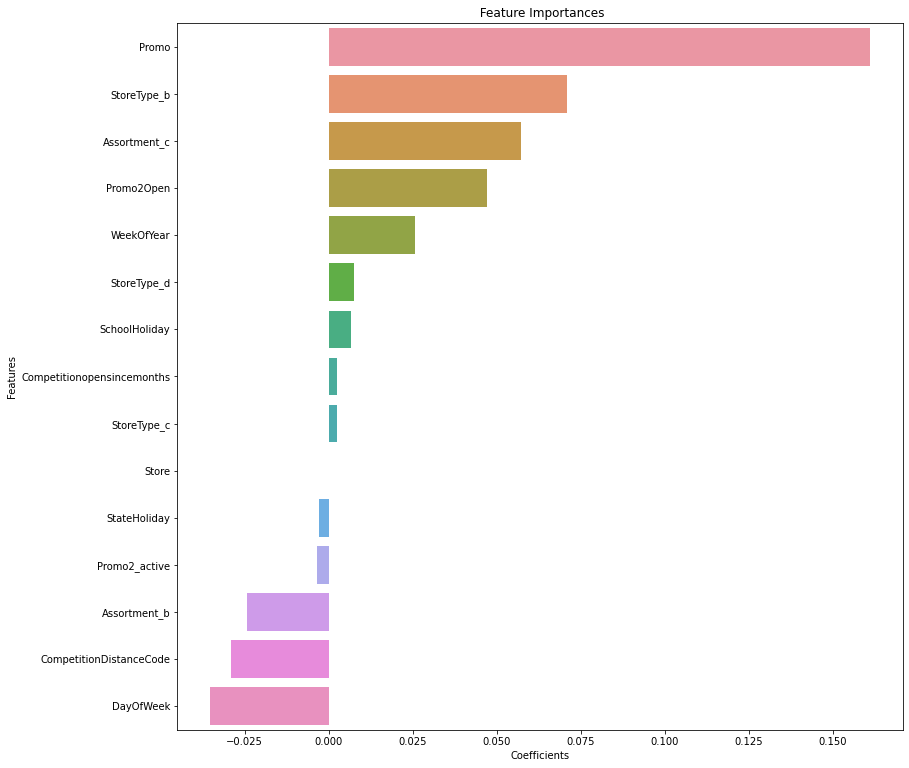

In [353]:
Gridel_net.best_estimator_.coef_
# Checking the coefficients
temp=pd.DataFrame()
temp["Features"]=X_train.columns
temp["Coefficients"]=Gridel_net.best_estimator_.coef_.tolist()
temp.sort_values(by=["Coefficients"],ascending= False, inplace= True)
sns.barplot(temp["Coefficients"],temp["Features"])
plt.title(" Feature Importances");

Elastic Net model has a similar result with respect to Linear Regression model, except the fact that Store column has been eliminated which indicates store number has least impact on the sales.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [354]:

# Visualizing evaluation Metric Score chart
el_net_met=regression_metrics("Elastic Net",y_train,y_train_el_net_pred,y_test,y_test_el_net_pred)


--------------------------------------------------
MAE on train is: 1981.7619625782868
MAE on test is: 1909.5737058732632
--------------------------------------------------
RMSE on train is: 2805.2776033001874
RMSE on test is: 2721.4233393119575
--------------------------------------------------
MAPE on train is: 30.995747234718447  %
MAPE on test is: 28.39409940142969  %
--------------------------------------------------
R2 on train is: 0.18337484130229775
R2 on test is: 0.22391043664461285
--------------------------------------------------
Accuracy of train is: 69.00425276528155  %
Accuracy of test is: 71.60590059857032  %
--------------------------------------------------


In [355]:
add_to_metric_df(el_net_met)

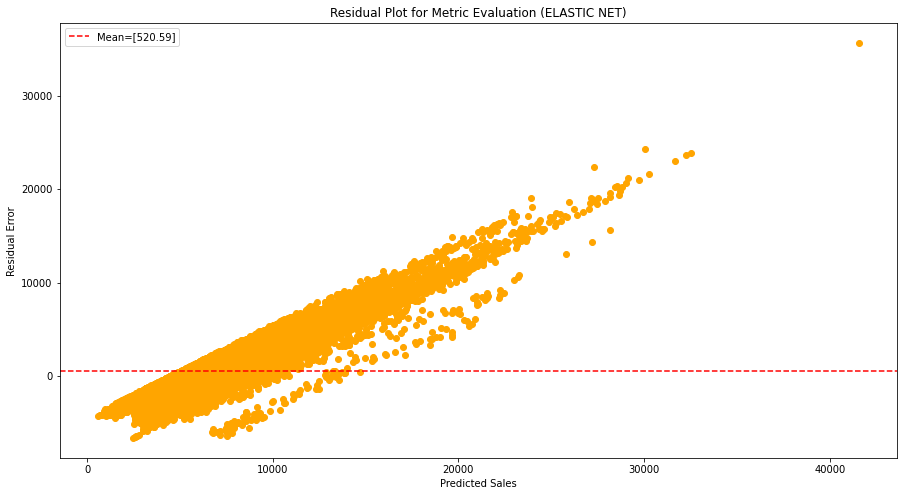

In [369]:
y_test_el_net_pred=pd.DataFrame(y_test_el_net_pred).values
residuals =np.exp(y_test) - np.exp(y_test_el_net_pred)
res_mean=residuals.mean().values.round(2)
plt.figure(figsize=(15,8))
plt.scatter(np.exp(y_test), residuals, c="orange")
plt.title("Residual Plot for Metric Evaluation (ELASTIC NET)")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

plt.axhline(y=res_mean, color='red', linestyle='--', label=f"Mean={res_mean}")
plt.legend();

#### 2. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [358]:
# ML Model - 3 Implementation
# import the Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
Dt_reg= DecisionTreeRegressor()

# Defining parameters
parameters= {'max_depth': [16,17,18], 'min_samples_leaf': [6,7,8], 'min_samples_split': [1,2,4]}

# Train the Decision Tree model
Griddecision_tree = GridSearchCV(Dt_reg, parameters, scoring='neg_mean_squared_error', cv=5)
Griddecision_tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [16, 17, 18],
                         'min_samples_leaf': [6, 7, 8],
                         'min_samples_split': [1, 2, 4]},
             scoring='neg_mean_squared_error')

In [359]:
# Predict the output
y_train_grid_Dt_pred = Griddecision_tree.predict(X_train)
y_test_grid_Dt_pred = Griddecision_tree.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {Griddecision_tree.best_params_}")
print(f"Negative mean square error is: {Griddecision_tree.best_score_}")

The best alpha value found out to be: {'max_depth': 18, 'min_samples_leaf': 7, 'min_samples_split': 2}
Negative mean square error is: -0.08208166950752259


In [360]:

# Calculating Regression Metrics
dt_met=regression_metrics("Decision Tree",y_train,y_train_grid_Dt_pred,y_test,y_test_grid_Dt_pred)

--------------------------------------------------
MAE on train is: 1058.669153869854
MAE on test is: 1242.6547018380522
--------------------------------------------------
RMSE on train is: 1597.1361385039875
RMSE on test is: 1864.3559273027013
--------------------------------------------------
MAPE on train is: 16.052987371999464  %
MAPE on test is: 18.294246142471025  %
--------------------------------------------------
R2 on train is: 0.7352993913236747
R2 on test is: 0.6357686791517192
--------------------------------------------------
Accuracy of train is: 83.94701262800054  %
Accuracy of test is: 81.70575385752898  %
--------------------------------------------------


In [361]:
add_to_metric_df(dt_met)

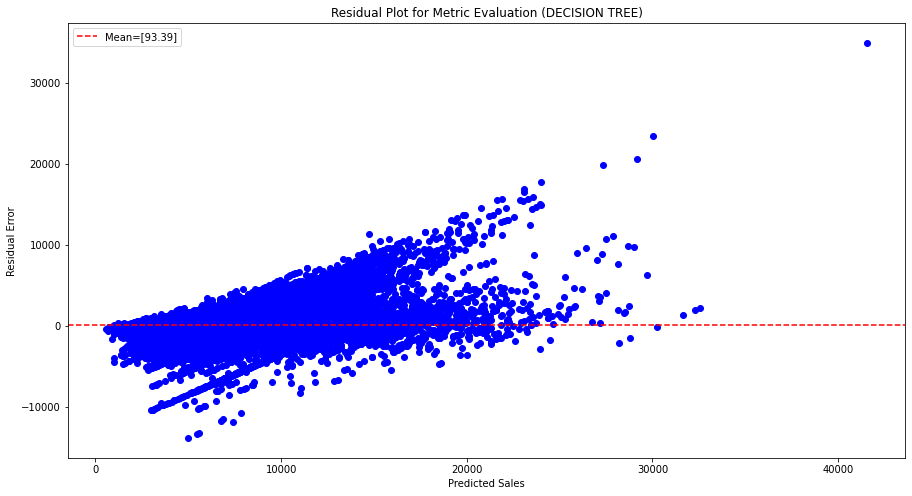

In [370]:
y_test_grid_Dt_pred=pd.DataFrame(y_test_grid_Dt_pred).values

residuals = np.exp(y_test) - np.exp(y_test_grid_Dt_pred)
res_mean=residuals.mean().values.round(2)
plt.figure(figsize=(15,8))
plt.scatter(np.exp(y_test), residuals, c="blue")
plt.title("Residual Plot for Metric Evaluation (DECISION TREE)")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

plt.axhline(y=res_mean, color='red', linestyle='--', label=f"Mean={res_mean}")
plt.legend();

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [363]:
# Visualizing evaluation Metric Score chart

In [364]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

### ML Model - 4- Random Forest


In [365]:
# import ridge regression from sklearn library
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge instance
Rf_reg= RandomForestRegressor()

# Defining parameters
parameters= {'n_estimators':[100], 'max_depth': [17,19,20], 'min_samples_leaf': [1, 2]}

# Train the model
GridRf_reg = RandomizedSearchCV(Rf_reg, parameters, n_iter=5, n_jobs=-1, scoring='neg_mean_squared_error', cv=3,  verbose=3)
GridRf_reg.fit(X_train,y_train)

# Predict the output
y_train_grid_Rf_pred = GridRf_reg.predict(X_train)
y_test_grid_Rf_pred = GridRf_reg.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {GridRf_reg.best_params_}")
print(f"Negative mean square error is: {GridRf_reg.best_score_}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
The best alpha value found out to be: {'n_estimators': 100, 'min_samples_leaf': 2, 'max_depth': 20}
Negative mean square error is: -0.05285126049305119


In [366]:

# Calculating Regression Metrics
rf_met=regression_metrics("Random Forest",y_train,y_train_grid_Rf_pred,y_test,y_test_grid_Rf_pred)

--------------------------------------------------
MAE on train is: 761.4302429651325
MAE on test is: 968.0586985276422
--------------------------------------------------
RMSE on train is: 1165.3855179577167
RMSE on test is: 1439.1610501360035
--------------------------------------------------
MAPE on train is: 11.345636926085657  %
MAPE on test is: 14.00012355116654  %
--------------------------------------------------
R2 on train is: 0.8590677775901956
R2 on test is: 0.7829606768525982
--------------------------------------------------
Accuracy of train is: 88.65436307391434  %
Accuracy of test is: 85.99987644883346  %
--------------------------------------------------


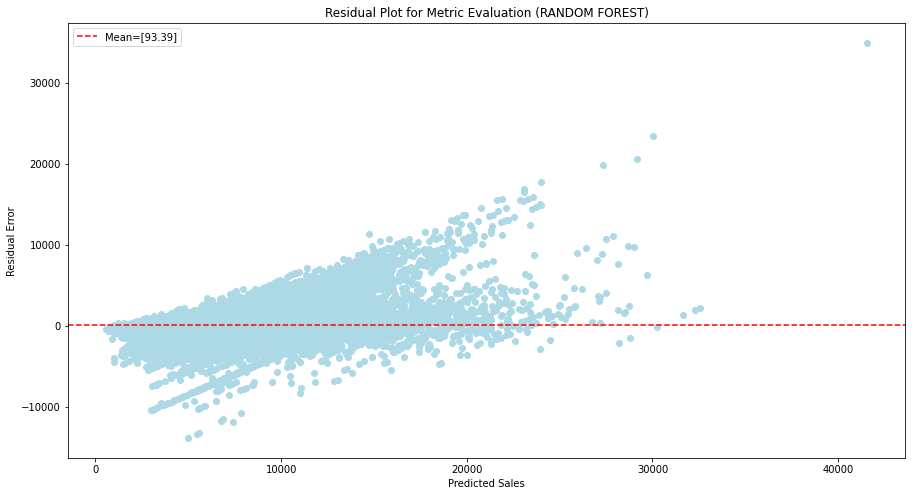

In [371]:
y_test_grid_Dt_pred=pd.DataFrame(y_test_grid_Dt_pred).values

residuals = np.exp(y_test) - np.exp(y_test_grid_Dt_pred)
res_mean=residuals.mean().values.round(2)
plt.figure(figsize=(15,8))
plt.scatter(np.exp(y_test), residuals, c="lightblue")
plt.title("Residual Plot for Metric Evaluation (RANDOM FOREST)")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

plt.axhline(y=res_mean, color='red', linestyle='--', label=f"Mean={res_mean}")
plt.legend();

In [372]:
add_to_metric_df(rf_met)

In [373]:
metric_df

,Model_Name,Train_MAE,Train_RMSE,Train_R2,Train_MAPE,Test_MAE,Test_RMSE,Test_R2,Test_MAPE
0,Linear Regression,1981.996247,2804.586022,0.183777,30.997746,1909.510237,2720.017227,0.224712,28.404424
1,Elastic Net,1981.761963,2805.277603,0.183375,30.995747,1909.573706,2721.423339,0.223910,28.394099
2,Decision Tree,1058.669154,1597.136139,0.735299,16.052987,1242.654702,1864.355927,0.635769,18.294246
3,Random Forest,761.430243,1165.385518,0.859068,11.345637,968.058699,1439.161050,0.782961,14.000124


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***